# **MÔI TRƯỜNG LẬP TRÌNH**

## ***Thư viện***

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%pip install pyECLAT

In [3]:
# Thư viện sử dụng
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import display

# Luật kết hợp
from itertools import combinations
from mlxtend import preprocessing, frequent_patterns
from pyECLAT import ECLAT
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
import time

## ***File***

In [4]:
# Tải file Groceries 1.csv (ban đầu)
!gdown --id 1u0Lthh7TxUeb40XteSveTOyxWpXIYHCK

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1u0Lthh7TxUeb40XteSveTOyxWpXIYHCK
To: /content/Groceries 1.csv
100% 1.10M/1.10M [00:00<00:00, 35.5MB/s]


In [5]:
# Tải file Groceries 1_Used.csv (sau khi tiền xử lý)
!gdown 1Le-gfmm5v-Zsh3aqmQZOmBVGu23ZpdPW

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Downloading...
From: https://drive.google.com/uc?id=1Le-gfmm5v-Zsh3aqmQZOmBVGu23ZpdPW
To: /content/Groceries 1_Used.csv
100% 608k/608k [00:00<00:00, 3.17MB/s]


In [6]:
# Tải file Groceries 1_Group.csv (sau khi tiền xử lý và được gom nhóm)
!gdown 12Zw6oqwAjTacLBjatxSSPlmdwinh-GaY

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Downloading...
From: https://drive.google.com/uc?id=12Zw6oqwAjTacLBjatxSSPlmdwinh-GaY
To: /content/Groceries 1_Group.csv
100% 608k/608k [00:00<00:00, 27.3MB/s]


In [7]:
# Tải file Groceries 1_NonGroup.csv (sau khi tiền xử lý và không gom nhóm)
!gdown 1lGCSvZfHEJvfaNmOPuc-kGZ_2ILKY1Xr

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Downloading...
From: https://drive.google.com/uc?id=1lGCSvZfHEJvfaNmOPuc-kGZ_2ILKY1Xr
To: /content/Groceries 1_NonGroup.csv
100% 755k/755k [00:00<00:00, 9.82MB/s]


In [8]:
# Đọc dữ liệu ban đầu
raw_df = pd.read_csv('Groceries 1.csv')
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
raw_df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [10]:
# Đọc dữ liệu tiền xử lý gom nhóm sản phẩm
group_df = pd.read_csv('Groceries 1_Group.csv')
group_df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13877 entries, 0 to 13876
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   invoice                13877 non-null  object
 1   group_itemDescription  13877 non-null  object
dtypes: object(2)
memory usage: 217.0+ KB


In [11]:
group_df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,invoice,group_itemDescription
0,1000_032015,"{'meats', 'grains', 'milk', 'dairy'}"
1,1000_052015,"{'energy drinks', 'vegetables'}"
2,1000_062014,"{'grains', 'milk', 'other foods'}"
3,1000_072015,{'alcohol'}
4,1000_112015,"{'meats', 'cosmetics'}"


In [12]:
# Đọc dữ liệu tiền xử lý không gom nhóm sản phẩm
nongroup_df = pd.read_csv('Groceries 1_NonGroup.csv')
nongroup_df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13877 entries, 0 to 13876
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   invoice          13877 non-null  object
 1   itemDescription  13877 non-null  object
dtypes: object(2)
memory usage: 217.0+ KB


In [13]:
nongroup_df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,invoice,itemDescription
0,1000_032015,"{'whole milk', 'semi-finished bread', 'yogurt'..."
1,1000_052015,"{'soda', 'pickled vegetables'}"
2,1000_062014,"{'salty snack', 'pastry', 'whole milk'}"
3,1000_072015,"{'canned beer', 'misc. beverages'}"
4,1000_112015,"{'hygiene articles', 'sausage'}"


# **Xây dựng luật kết hợp**

## ***ECLAT (Set Enumeration Tree)***

###*Với bộ dữ liệu gom nhóm khách hàng và không gom nhóm vật phẩm*

In [14]:
# Thư viện sử dụng
import pandas as pd
import re

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
# Đọc dữ liệu từ tệp CSV
GrcsNonGroup_df = nongroup_df.copy()
GrcsNonGroup_df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,invoice,itemDescription
0,1000_032015,"{'whole milk', 'semi-finished bread', 'yogurt'..."
1,1000_052015,"{'soda', 'pickled vegetables'}"
2,1000_062014,"{'salty snack', 'pastry', 'whole milk'}"
3,1000_072015,"{'canned beer', 'misc. beverages'}"
4,1000_112015,"{'hygiene articles', 'sausage'}"


In [16]:
# Loại bỏ các ký hiệu {, [, '
GrcsNonGroup_df['itemDescription'] = GrcsNonGroup_df['itemDescription'].astype(str)
GrcsNonGroup_df['itemDescription'] = GrcsNonGroup_df['itemDescription'].apply(lambda x: re.sub(r'[\{\[\'}]', '', str(x)))
GrcsNonGroup_df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,invoice,itemDescription
0,1000_032015,"whole milk, semi-finished bread, yogurt, sausage"
1,1000_052015,"soda, pickled vegetables"
2,1000_062014,"salty snack, pastry, whole milk"
3,1000_072015,"canned beer, misc. beverages"
4,1000_112015,"hygiene articles, sausage"


In [17]:
# Tìm tập hợp các mục duy nhất
items_nongroup = set()
for _, row in GrcsNonGroup_df.iterrows():
    item_set = row['itemDescription'].split(', ')
    items_nongroup.update(item_set)
items_nongroup = list(items_nongroup)
items_nongroup[:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['salt', 'jam', 'house keeping products', 'baby cosmetics', 'sliced cheese']

In [18]:
# Tính toán support và tìm các mẫu phổ biến
total_samples = GrcsNonGroup_df.shape[0]
min_support_percent = 5
min_support = min_support_percent * total_samples / 100

frequent_patterns = []
for item in items_nongroup:
    support = GrcsNonGroup_df[GrcsNonGroup_df['itemDescription'].apply(lambda x: item in x.split(', '))].shape[0]
    if support >= min_support:
        frequent_patterns.append(([item], support))
frequent_patterns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(['sausage'], 896),
 (['rolls/buns'], 1623),
 (['other vegetables'], 1813),
 (['pip fruit'], 730),
 (['shopping bags'], 710),
 (['bottled water'], 900),
 (['tropical fruit'], 1010),
 (['root vegetables'], 1038),
 (['yogurt'], 1276),
 (['canned beer'], 701),
 (['whole milk'], 2333),
 (['citrus fruit'], 792),
 (['soda'], 1443),
 (['pastry'], 772)]

In [19]:
# Xây dựng cây Eclat
root = {'item': None, 'support': 0, 'children': {}}
for _, row in GrcsNonGroup_df.iterrows():
    item_set = row['itemDescription'].split(', ')
    current_node = root
    for item in items_nongroup:
        if item in current_node['children']:
            child = current_node['children'][item]
            child['support'] += 1
        else:
            child = {'item': item, 'support': 1, 'children': {}}
            current_node['children'][item] = child
        if child['support'] >= min_support:
            current_node = child
root

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'item': None,
 'support': 0,
 'children': {'salt': {'item': 'salt',
   'support': 13877,
   'children': {'jam': {'item': 'jam',
     'support': 13184,
     'children': {'house keeping products': {'item': 'house keeping products',
       'support': 12491,
       'children': {'baby cosmetics': {'item': 'baby cosmetics',
         'support': 11798,
         'children': {'sliced cheese': {'item': 'sliced cheese',
           'support': 11105,
           'children': {'white bread': {'item': 'white bread',
             'support': 10412,
             'children': {'prosecco': {'item': 'prosecco',
               'support': 9719,
               'children': {'napkins': {'item': 'napkins',
                 'support': 9026,
                 'children': {'kitchen towels': {'item': 'kitchen towels',
                   'support': 8333,
                   'children': {'syrup': {'item': 'syrup',
                     'support': 7640,
                     'children': {'toilet cleaner': {'item': 'toilet cle

In [20]:
# Tìm các mẫu phổ biến từ cây Eclat
def find_frequent_patterns(node, prefix):
    frequent_patterns = []
    if node['item'] is not None and node['support'] >= min_support:
        frequent_patterns.append((prefix + [node['item']], node['support']))
    for child in node['children'].values():
        frequent_patterns.extend(find_frequent_patterns(child, prefix + [node['item']]))
    return frequent_patterns
if root is None:
    frequent_patterns = find_frequent_patterns(root, [])
frequent_patterns[:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(['sausage'], 896),
 (['rolls/buns'], 1623),
 (['other vegetables'], 1813),
 (['pip fruit'], 730),
 (['shopping bags'], 710)]

In [21]:
# Tạo DataFrame từ danh sách mẫu phổ biến
df_frequent_patterns = pd.DataFrame(frequent_patterns, columns=['Pattern', 'Support'])
df_frequent_patterns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Pattern,Support
0,[sausage],896
1,[rolls/buns],1623
2,[other vegetables],1813
3,[pip fruit],730
4,[shopping bags],710
5,[bottled water],900
6,[tropical fruit],1010
7,[root vegetables],1038
8,[yogurt],1276
9,[canned beer],701


In [22]:
# Sắp xếp theo thứ tự giảm dần của cột 'Support'
df_frequent_patterns = df_frequent_patterns.sort_values(by='Support', ascending=False)
df_frequent_patterns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Pattern,Support
10,[whole milk],2333
2,[other vegetables],1813
1,[rolls/buns],1623
12,[soda],1443
8,[yogurt],1276
7,[root vegetables],1038
6,[tropical fruit],1010
5,[bottled water],900
0,[sausage],896
11,[citrus fruit],792


###*Với bộ dữ liệu gom nhóm cả khách hàng và sản phẩm*

In [23]:
# Thư viện sử dụng
import pandas as pd
import re

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
# Đọc dữ liệu từ tệp CSV
GrcsGroup_df = group_df.copy()
GrcsGroup_df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,invoice,group_itemDescription
0,1000_032015,"{'meats', 'grains', 'milk', 'dairy'}"
1,1000_052015,"{'energy drinks', 'vegetables'}"
2,1000_062014,"{'grains', 'milk', 'other foods'}"
3,1000_072015,{'alcohol'}
4,1000_112015,"{'meats', 'cosmetics'}"


In [25]:
# Loại bỏ các ký hiệu {, [, '
GrcsGroup_df['group_itemDescription'] = GrcsGroup_df['group_itemDescription'].astype(str)
GrcsGroup_df['group_itemDescription'] = GrcsGroup_df['group_itemDescription'].apply(lambda x: re.sub(r'[\{\[\'}]', '', str(x)))
GrcsGroup_df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,invoice,group_itemDescription
0,1000_032015,"meats, grains, milk, dairy"
1,1000_052015,"energy drinks, vegetables"
2,1000_062014,"grains, milk, other foods"
3,1000_072015,alcohol
4,1000_112015,"meats, cosmetics"


In [26]:
# Tìm tập hợp các mục duy nhất
items = set()
for _, row in GrcsGroup_df.iterrows():
    item_set = row['group_itemDescription'].split(', ')
    items.update(item_set)
itemsets = list(items)
itemsets[:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['fruit', 'other drinks', 'sugary', 'juice', 'seasoning']

In [27]:
# Tính toán support và tìm các mẫu phổ biến
total_samples = GrcsGroup_df.shape[0]
min_support_percent = 5
min_support = min_support_percent * total_samples / 100

frequent_patterns = []
for item in items:
    support = GrcsGroup_df[GrcsGroup_df['group_itemDescription'].apply(lambda x: item in x.split(', '))].shape[0]
    if support >= min_support:
        frequent_patterns.append(([item], support))
frequent_patterns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(['fruit'], 2904),
 (['sugary'], 2102),
 (['seasoning'], 1077),
 (['energy drinks'], 1922),
 (['alcohol'], 2138),
 (['meats'], 3595),
 (['other item'], 2365),
 (['water'], 900),
 (['others'], 1411),
 (['dairy'], 3290),
 (['grains'], 2485),
 (['other foods'], 2409),
 (['milk'], 2909),
 (['bags'], 786),
 (['vegetables'], 3585)]

In [28]:
# Xây dựng cây Eclat
root = {'item': None, 'frequency': 0, 'children': {}}
for _, row in GrcsGroup_df.iterrows():
    item_set = row['group_itemDescription'].split(', ')
    current_node = root
    for item in items:
        if item in current_node['children']:
            child = current_node['children'][item]
            child['frequency'] += 1
        else:
            child = {'item': item, 'frequency': 1, 'children': {}}
            current_node['children'][item] = child
        if child['frequency'] >= min_support:
            current_node = child
root

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'item': None,
 'frequency': 0,
 'children': {'fruit': {'item': 'fruit',
   'frequency': 13877,
   'children': {'other drinks': {'item': 'other drinks',
     'frequency': 13184,
     'children': {'sugary': {'item': 'sugary',
       'frequency': 12491,
       'children': {'juice': {'item': 'juice',
         'frequency': 11798,
         'children': {'seasoning': {'item': 'seasoning',
           'frequency': 11105,
           'children': {'pet care': {'item': 'pet care',
             'frequency': 10412,
             'children': {'energy drinks': {'item': 'energy drinks',
               'frequency': 9719,
               'children': {'alcohol': {'item': 'alcohol',
                 'frequency': 9026,
                 'children': {'meats': {'item': 'meats',
                   'frequency': 8333,
                   'children': {'cosmetics': {'item': 'cosmetics',
                     'frequency': 7640,
                     'children': {'other item': {'item': 'other item',
                       

In [29]:
# Tìm các mẫu phổ biến từ cây Eclat
def find_frequent_patterns(node, prefix):
    frequent_patterns = []
    if node['item'] is not None and node['support'] >= min_support:
        frequent_patterns.append((prefix + [node['item']], node['support']))
    for child in node['children'].values():
        frequent_patterns.extend(find_frequent_patterns(child, prefix + [node['item']]))
    return frequent_patterns
if root is None:
    frequent_patterns = find_frequent_patterns(root, [])
frequent_patterns[:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(['fruit'], 2904),
 (['sugary'], 2102),
 (['seasoning'], 1077),
 (['energy drinks'], 1922),
 (['alcohol'], 2138)]

In [30]:
# Tạo DataFrame từ danh sách mẫu phổ biến
df_frequent_patterns = pd.DataFrame(frequent_patterns, columns=['Pattern', 'Support'])
df_frequent_patterns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Pattern,Support
0,[fruit],2904
1,[sugary],2102
2,[seasoning],1077
3,[energy drinks],1922
4,[alcohol],2138
5,[meats],3595
6,[other item],2365
7,[water],900
8,[others],1411
9,[dairy],3290


In [31]:
# Sắp xếp theo thứ tự giảm dần của cột 'Support'
df_frequent_patterns = df_frequent_patterns.sort_values(by='Support', ascending=False)
df_frequent_patterns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Pattern,Support
5,[meats],3595
14,[vegetables],3585
9,[dairy],3290
12,[milk],2909
0,[fruit],2904
10,[grains],2485
11,[other foods],2409
6,[other item],2365
4,[alcohol],2138
1,[sugary],2102


Tính linh hoạt của luật: Bằng cách gom nhóm các sản phẩm có đặc điểm giống nhau thành các nhóm cụ thể, giúp giảm sự phân tán của dữ liệu và tạo ra các luật có ý nghĩa hơn và dễ hiểu hơn vì chúng phản ánh sự tương tác giữa các nhóm sản phẩm. Điều này đồng nghĩa với việc nhóm có thể tìm hiểu và giải thích mối quan hệ giữa các nhóm sản phẩm một cách tổng quát hơn.

Quản lý kích thước dữ liệu: Khi gom nhóm các sản phẩm có đặc điểm giống nhau, giúp giảm kích thước của dữ liệu và số lượng luật phát sinh. Đồng thời giảm thời gian tính toán và làm cho quá trình xử lý dữ liệu dễ dàng hơn. Việc quản lý kích thước dữ liệu có thể trở nên đơn giản hơn và giúp tạo ra kết quả tổng quát hơn, đặc biệt là khi nhóm muốn quan tâm đến các mô hình và mẫu phổ biến chung.

## **TÌM LUẬT KẾT HỢP MẠNH**

### *Với bộ dữ liệu không gom nhóm sản phẩm*

In [ ]:
# loại bỏ các ký hiệu {, [, '
nongroup_df['itemDescription'] = nongroup_df['itemDescription'].astype(str)
nongroup_df['itemDescription'] = nongroup_df['itemDescription'].apply(lambda x: re.sub(r'[\{\[\'}]', '', str(x)))
nongroup_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,invoice,itemDescription
0,1000_032015,"whole milk, semi-finished bread, yogurt, sausage"
1,1000_052015,"soda, pickled vegetables"
2,1000_062014,"salty snack, pastry, whole milk"
3,1000_072015,"canned beer, misc. beverages"
4,1000_112015,"hygiene articles, sausage"
...,...,...
13872,4999_092014,"semi-finished bread, newspapers"
13873,4999_122015,"herbs, bottled water"
13874,5000_092014,"fruit/vegetable juice, onions"
13875,5000_102015,"soda, semi-finished bread, root vegetables"


In [ ]:
# tách item từ cột itemDescription
nongroup_eclat_df = nongroup_df['itemDescription'].str.get_dummies(', ')
nongroup_eclat_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13872,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13873,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13874,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13875,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# chuyển đổi format để sử dụng pyECLAT
for column in nongroup_eclat_df.columns:
    nongroup_eclat_df[column] = nongroup_eclat_df[column].apply(lambda x: column if x else None)
nongroup_eclat_df.columns = range(len(nongroup_eclat_df.columns))
nongroup_eclat_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,whole milk,yogurt,None
1,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,whole milk,None,None
3,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13872,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
13873,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
13874,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
13875,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
nongroup_eclat1 = ECLAT(nongroup_eclat_df, verbose = True)
index1, support1 = nongroup_eclat1.fit(min_support=0.05, separator=', ')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 168/168 [00:00<00:00, 2013.82it/s]


Combination 1 by 1


14it [00:00, 49.11it/s]


Combination 2 by 2


91it [00:00, 108.18it/s]


Combination 3 by 3


364it [00:03, 102.69it/s]


In [ ]:
nongroup_eclat_df1 = pd.DataFrame(list(index1.items()), columns=['Item', 'Transactions'])
nongroup_eclat_df1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Item,Transactions
0,pip fruit,"[20, 34, 35, 56, 59, 113, 119, 126, 127, 152, ..."
1,canned beer,"[3, 18, 51, 71, 72, 85, 88, 95, 124, 237, 256,..."
2,other vegetables,"[13, 19, 22, 39, 47, 60, 61, 83, 103, 105, 128..."
3,rolls/buns,"[8, 15, 17, 22, 24, 25, 26, 35, 38, 42, 52, 55..."
4,whole milk,"[0, 2, 8, 9, 10, 20, 21, 22, 26, 27, 39, 40, 4..."
5,sausage,"[0, 4, 8, 17, 49, 78, 82, 90, 110, 117, 126, 1..."
6,soda,"[1, 5, 9, 30, 63, 80, 98, 105, 111, 150, 152, ..."
7,citrus fruit,"[38, 54, 90, 123, 138, 143, 186, 212, 234, 250..."
8,root vegetables,"[16, 21, 30, 42, 48, 60, 68, 81, 83, 88, 89, 9..."
9,tropical fruit,"[11, 20, 30, 32, 42, 46, 75, 83, 111, 115, 122..."


Không có luật nào kết hợp từ 2 phần tử trở lên với ngưỡng hỗ trợ 10% khi sử dụng bộ dữ liệu không gom nhóm.
=> Giảm ngưỡng hỗ trợ xuống còn 1%.

In [ ]:
nongroup_eclat2 = ECLAT(nongroup_eclat_df, verbose = False)
index1, support1 = nongroup_eclat2.fit(min_support=0.01, min_combination=1, separator=', ')
nongroup_eclat_df2 = pd.DataFrame(list(index1.items()), columns=['Item', 'Transactions'])
nongroup_eclat_df2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Combination 1 by 1


66it [00:01, 53.19it/s]


Combination 2 by 2


2145it [00:22, 95.16it/s]


Combination 3 by 3


45760it [08:09, 93.40it/s] 


,Item,Transactions
0,white wine,"[30, 119, 188, 339, 440, 602, 778, 862, 901, 9..."
1,white bread,"[7, 45, 81, 105, 108, 119, 122, 133, 156, 209,..."
2,newspapers,"[32, 70, 104, 115, 120, 189, 233, 269, 278, 30..."
3,bottled beer,"[26, 49, 57, 81, 165, 185, 201, 221, 231, 267,..."
4,misc. beverages,"[3, 244, 309, 352, 356, 385, 429, 473, 484, 55..."
...,...,...
71,"rolls/buns, soda","[111, 153, 169, 256, 280, 478, 483, 573, 584, ..."
72,"whole milk, sausage","[0, 8, 49, 126, 311, 319, 508, 529, 531, 699, ..."
73,"whole milk, soda","[9, 153, 177, 216, 317, 373, 374, 449, 478, 48..."
74,"whole milk, tropical fruit","[20, 136, 203, 207, 216, 224, 266, 317, 325, 3..."


In [ ]:
nongroup_frequent_itemsets = pd.DataFrame(list(support1.items()), columns=['Items', 'Support'])
nongroup_frequent_itemsets = nongroup_frequent_itemsets.sort_values(by='Support', ascending=False).reset_index()
nongroup_frequent_itemsets = nongroup_frequent_itemsets.drop(columns = 'index')
nongroup_frequent_itemsets['Length'] = nongroup_frequent_itemsets['Items'].str.count(',')+1
nongroup_frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Items,Support,Length
0,whole milk,0.168120,1
1,other vegetables,0.130648,1
2,rolls/buns,0.116956,1
3,soda,0.103985,1
4,yogurt,0.091951,1
...,...,...,...
71,"other vegetables, yogurt",0.010737,2
72,flour,0.010521,1
73,"whole milk, tropical fruit",0.010449,2
74,semi-finished bread,0.010233,1


In [ ]:
# luật kết hợp > 2 item với ngưỡng hỗ trợ trên 1%
nongroup_2items = nongroup_frequent_itemsets[(nongroup_frequent_itemsets['Length'] >= 2) & (nongroup_frequent_itemsets['Support'] >= 0.01)]
nongroup_2items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Items,Support,Length
43,"other vegetables, whole milk",0.018448,2
48,"rolls/buns, whole milk",0.017079,2
59,"soda, whole milk",0.014484,2
60,"yogurt, whole milk",0.013692,2
62,"other vegetables, rolls/buns",0.012827,2
65,"other vegetables, soda",0.012178,2
68,"whole milk, sausage",0.011170,2
71,"other vegetables, yogurt",0.010737,2
73,"whole milk, tropical fruit",0.010449,2
75,"rolls/buns, soda",0.010089,2


In [ ]:
def calculate_nongroup_confidence(row):
    items = row['Items'].split(', ')
    first_item = items[0]
    # tìm support
    support = row['Support']
    first_support = nongroup_frequent_itemsets[nongroup_frequent_itemsets['Items'].str.contains(first_item)]['Support'].values[0]
    # tìm confidence
    confidence = support / first_support
    return confidence

# Thêm cột Confidence vào DataFrame
nongroup_2items['Confidence'] = nongroup_2items.apply(calculate_nongroup_confidence, axis=1)
nongroup_2items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Items,Support,Length,Confidence
43,"other vegetables, whole milk",0.018448,2,0.141202
48,"rolls/buns, whole milk",0.017079,2,0.146026
59,"soda, whole milk",0.014484,2,0.139293
60,"yogurt, whole milk",0.013692,2,0.148903
62,"other vegetables, rolls/buns",0.012827,2,0.098180
65,"other vegetables, soda",0.012178,2,0.093216
68,"whole milk, sausage",0.011170,2,0.066438
71,"other vegetables, yogurt",0.010737,2,0.082184
73,"whole milk, tropical fruit",0.010449,2,0.062152
75,"rolls/buns, soda",0.010089,2,0.086260


Conf thấp, thiếu độ tin tưởng

### *Với bộ dữ liệu gom nhóm cả khách hàng và sản phẩm*

In [ ]:
# loại bỏ các ký hiệu {, [, '
group_df['group_itemDescription'] = group_df['group_itemDescription'].astype(str)
group_df['group_itemDescription'] = group_df['group_itemDescription'].apply(lambda x: re.sub(r'[\{\[\'}]', '', str(x)))
group_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,invoice,group_itemDescription
0,1000_032015,"meats, grains, milk, dairy"
1,1000_052015,"energy drinks, vegetables"
2,1000_062014,"grains, milk, other foods"
3,1000_072015,alcohol
4,1000_112015,"meats, cosmetics"
...,...,...
13872,4999_092014,"grains, others"
13873,4999_122015,"water, seasoning"
13874,5000_092014,"juice, vegetables"
13875,5000_102015,"energy drinks, vegetables, grains"


In [ ]:
# tách item từ cột itemDescription
group_eclat_df = group_df['group_itemDescription'].str.get_dummies(', ')
group_eclat_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,alcohol,bags,chemistry products,cosmetics,dairy,energy drinks,fruit,grains,house facilities,juice,...,milk,other drinks,other foods,other item,others,pet care,seasoning,sugary,vegetables,water
0,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13872,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
13873,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
13874,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
13875,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# chuyển đổi format để sử dụng pyECLAT
for column in group_eclat_df.columns:
    group_eclat_df[column] = group_eclat_df[column].apply(lambda x: column if x else None)
group_eclat_df.columns = range(len(group_eclat_df.columns))
group_eclat_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,None,None,None,None,dairy,None,None,grains,None,None,...,milk,None,None,None,None,None,None,None,None,None
1,None,None,None,None,None,energy drinks,None,None,None,None,...,None,None,None,None,None,None,None,None,vegetables,None
2,None,None,None,None,None,None,None,grains,None,None,...,milk,None,other foods,None,None,None,None,None,None,None
3,alcohol,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,None,None,None,cosmetics,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13872,None,None,None,None,None,None,None,grains,None,None,...,None,None,None,None,others,None,None,None,None,None
13873,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,seasoning,None,None,water
13874,None,None,None,None,None,None,None,None,None,juice,...,None,None,None,None,None,None,None,None,vegetables,None
13875,None,None,None,None,None,energy drinks,None,grains,None,None,...,None,None,None,None,None,None,None,None,vegetables,None


In [ ]:
group_eclat1 = ECLAT(group_eclat_df, verbose = True)
index2, support2 = group_eclat1.fit(min_support=0.1, separator=', ')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 22/22 [00:00<00:00, 1209.60it/s]


Combination 1 by 1


12it [00:00, 112.60it/s]


Combination 2 by 2


66it [00:00, 196.91it/s]


Combination 3 by 3


220it [00:01, 204.01it/s]


In [ ]:
group_eclat_df1 = pd.DataFrame(list(index2.items()), columns=['Item', 'Transactions'])
group_eclat_df1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Item,Transactions
0,alcohol,"[3, 18, 22, 26, 29, 30, 49, 51, 57, 58, 69, 71..."
1,sugary,"[12, 22, 26, 29, 36, 38, 44, 55, 63, 67, 82, 8..."
2,energy drinks,"[1, 5, 9, 30, 34, 63, 80, 84, 98, 105, 111, 15..."
3,vegetables,"[1, 13, 16, 19, 21, 22, 30, 39, 41, 42, 46, 47..."
4,dairy,"[0, 6, 10, 30, 32, 37, 38, 39, 40, 43, 49, 56,..."
5,grains,"[0, 2, 7, 21, 27, 33, 38, 41, 45, 64, 65, 81, ..."
6,meats,"[0, 4, 5, 6, 8, 14, 17, 18, 26, 29, 31, 36, 39..."
7,fruit,"[11, 20, 30, 32, 34, 35, 38, 39, 42, 46, 54, 5..."
8,other foods,"[2, 5, 22, 23, 26, 30, 45, 46, 53, 66, 77, 80,..."
9,other item,"[7, 8, 15, 17, 22, 24, 25, 26, 35, 38, 42, 45,..."


Không có luật nào kết hợp từ 2 phần tử trở lên với ngưỡng hỗ trợ 10% khi sử dụng bộ dữ liệu không gom nhóm.
=> Giảm ngưỡng hỗ trợ xuống còn 1%.

In [ ]:
group_eclat2 = ECLAT(group_eclat_df, verbose = False)
index2, support2 = group_eclat2.fit(min_support=0.01, min_combination=1, separator=', ')
group_eclat_df2 = pd.DataFrame(list(index2.items()), columns=['Item', 'Transactions'])
group_eclat_df2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Combination 1 by 1


21it [00:00, 124.87it/s]


Combination 2 by 2


210it [00:01, 168.18it/s]


Combination 3 by 3


1330it [00:07, 169.81it/s]


,Item,Transactions
0,alcohol,"[3, 18, 22, 26, 29, 30, 49, 51, 57, 58, 69, 71..."
1,sugary,"[12, 22, 26, 29, 36, 38, 44, 55, 63, 67, 82, 8..."
2,energy drinks,"[1, 5, 9, 30, 34, 63, 80, 84, 98, 105, 111, 15..."
3,vegetables,"[1, 13, 16, 19, 21, 22, 30, 39, 41, 42, 46, 47..."
4,dairy,"[0, 6, 10, 30, 32, 37, 38, 39, 40, 43, 49, 56,..."
...,...,...
106,"others, milk","[39, 120, 142, 164, 269, 373, 382, 393, 407, 4..."
107,"vegetables, dairy, meats","[39, 90, 178, 476, 626, 627, 781, 805, 877, 88..."
108,"vegetables, meats, fruit","[39, 83, 90, 134, 136, 169, 191, 296, 309, 509..."
109,"dairy, meats, fruit","[39, 90, 126, 167, 325, 724, 877, 886, 895, 94..."


In [ ]:
group_frequent_itemsets = pd.DataFrame(list(support2.items()), columns=['Items', 'Support'])
group_frequent_itemsets = group_frequent_itemsets.sort_values(by='Support', ascending=False).reset_index()
group_frequent_itemsets = group_frequent_itemsets.drop(columns = 'index')
group_frequent_itemsets['Length'] = group_frequent_itemsets['Items'].str.count(',')+1
group_frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Items,Support,Length
0,meats,0.259062,1
1,vegetables,0.258341,1
2,dairy,0.237083,1
3,milk,0.209627,1
4,fruit,0.209267,1
...,...,...,...
106,"alcohol, seasoning",0.010737,2
107,"grains, water",0.010665,2
108,"vegetables, meats, fruit",0.010521,3
109,"fruit, bags",0.010089,2


In [ ]:
# luật kết hợp > 2 item với ngưỡng hỗ trợ trên 1%
group_2items = group_frequent_itemsets[(group_frequent_itemsets['Length'] >= 2) & (nongroup_frequent_itemsets['Support'] >= 0.01)]
group_2items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Items,Support,Length
14,"dairy, meats",0.057289,2
15,"vegetables, meats",0.056640,2
17,"vegetables, dairy",0.051812,2
18,"meats, milk",0.047200,2
19,"vegetables, fruit",0.045687,2
20,"vegetables, milk",0.045111,2
21,"meats, fruit",0.043021,2
22,"dairy, milk",0.042805,2
23,"dairy, fruit",0.042012,2
24,"grains, meats",0.041147,2


In [ ]:
def calculate_group_confidence(row):
    items = row['Items'].split(', ')
    first_item = items[0]
    # tìm support
    support = row['Support']
    first_support = group_frequent_itemsets[group_frequent_itemsets['Items'].str.contains(first_item)]['Support'].values[0]
    # tìm confidence
    confidence = support / first_support
    return confidence

# Thêm cột Confidence vào DataFrame
group_2items['Confidence'] = group_2items.apply(calculate_group_confidence, axis=1)
group_2items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Items,Support,Length,Confidence
14,"dairy, meats",0.057289,2,0.241641
15,"vegetables, meats",0.056640,2,0.219247
17,"vegetables, dairy",0.051812,2,0.200558
18,"meats, milk",0.047200,2,0.182197
19,"vegetables, fruit",0.045687,2,0.176848
20,"vegetables, milk",0.045111,2,0.174616
21,"meats, fruit",0.043021,2,0.166064
22,"dairy, milk",0.042805,2,0.180547
23,"dairy, fruit",0.042012,2,0.177204
24,"grains, meats",0.041147,2,0.229779


Conf gia tăng đáng kể

##**ĐÁNH GIÁ MẪU DỮ LIỆU**

In [ ]:
# Thư viện sử dụng
import time

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###*Với bộ dữ liệu không gom nhóm sản phẩm*

In [ ]:
# Tính toán support và tìm các mẫu phổ biến
total_samples = GrcsNonGroup_df.shape[0]
min_support_percent = 5
min_support = min_support_percent * total_samples / 100

frequent_patterns = []
for item in items_nongroup:
    support = GrcsNonGroup_df[GrcsNonGroup_df['itemDescription'].apply(lambda x: item in x.split(', '))].shape[0]
    if support >= min_support:
        frequent_patterns.append(([item], support))

# Bắt đầu đo thời gian
start_time1 = time.time()

# Xây dựng cây Eclat
root = {'item': None, 'support': 0, 'children': {}}
for _, row in GrcsNonGroup_df.iterrows():
    item_set = row['itemDescription'].split(', ')
    current_node = root
    for item in items_nongroup:
        if item in current_node['children']:
            child = current_node['children'][item]
            child['support'] += 1
        else:
            child = {'item': item, 'support': 1, 'children': {}}
            current_node['children'][item] = child
        if child['support'] >= min_support:
            current_node = child

# Tìm các mẫu phổ biến từ cây Eclat
def find_frequent_patterns(node, prefix):
    frequent_patterns = []
    if node['item'] is not None and node['support'] >= min_support:
        frequent_patterns.append((prefix + [node['item']], node['support']))
    for child in node['children'].values():
        frequent_patterns.extend(find_frequent_patterns(child, prefix + [node['item']]))
    return frequent_patterns
if root is None:
    frequent_patterns = find_frequent_patterns(root, [])

# Kết thúc đo thời gian
end_time1 = time.time()

# Tính thời gian thực thi
execution_time_ngr = end_time1 - start_time1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###*Với bộ dữ liệu gom nhóm sản phẩm*

In [ ]:
# Tính toán support và tìm các mẫu phổ biến
total_samples = GrcsGroup_df.shape[0]
min_support_percent = 5
min_support = min_support_percent * total_samples / 100

frequent_patterns = []
for item in items:
    support = GrcsGroup_df[GrcsGroup_df['group_itemDescription'].apply(lambda x: item in x.split(', '))].shape[0]
    if support >= min_support:
        frequent_patterns.append(([item], support))

# Bắt đầu đo thời gian
start_time2 = time.time()

# Xây dựng cây Eclat
root = {'item': None, 'support': 0, 'children': {}}
for _, row in GrcsGroup_df.iterrows():
    item_set = row['group_itemDescription'].split(', ')
    current_node = root
    for item in items:
        if item in current_node['children']:
            child = current_node['children'][item]
            child['support'] += 1
        else:
            child = {'item': item, 'support': 1, 'children': {}}
            current_node['children'][item] = child
        if child['support'] >= min_support:
            current_node = child

# Tìm các mẫu phổ biến từ cây Eclat
def find_frequent_patterns(node, prefix):
    frequent_patterns = []
    if node['item'] is not None and node['support'] >= min_support:
        frequent_patterns.append((prefix + [node['item']], node['support']))
    for child in node['children'].values():
        frequent_patterns.extend(find_frequent_patterns(child, prefix + [node['item']]))
    return frequent_patterns
if root is None:
    frequent_patterns = find_frequent_patterns(root, [])

# Kết thúc đo thời gian
end_time2 = time.time()

# Tính thời gian thực thi
execution_time_gr = end_time2 - start_time2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###*Kết quả*

In [ ]:
# In kết quả ra màn hình
print("Thời gian thực thi của bộ dữ liệu không gom nhóm sản phẩm: %.2f giây" % execution_time_ngr)

# In kết quả ra màn hình
print("Thời gian thực thi của bộ dữ liệu có gom nhóm sản phẩm: %.2f giây" % execution_time_gr)

Thời gian thực thi của bộ dữ liệu không gom nhóm sản phẩm: 1.67 giây
Thời gian thực thi của bộ dữ liệu có gom nhóm sản phẩm: 0.79 giây


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **THAY ĐỔI TOTAL ORDER**

###*Không gom nhóm sản phẩm*

In [32]:
# Tính toán support và tìm các mẫu phổ biến
total_samples = GrcsNonGroup_df.shape[0]  # Tổng số mẫu trong dữ liệu
min_support_percent = 10  # Đặt minSup dưới dạng phần trăm
min_support = min_support_percent * total_samples / 100

frequent_patterns = []
for item in items_nongroup:
    support = GrcsNonGroup_df[GrcsNonGroup_df['itemDescription'].apply(lambda x: item in x.split(', '))].shape[0]
    if support >= min_support:
        frequent_patterns.append(([item], support))

# Sắp xếp các mục theo thứ tự tăng dần về support
frequent_patterns = sorted(frequent_patterns, key=lambda x: x[1])

# Đo thời gian thuật toán
start_time = time.time()

# Xây dựng cây Eclat
root = {'item': None, 'support': 0, 'children': {}}
for _, row in GrcsNonGroup_df.iterrows():
    item_set = row['itemDescription'].split(', ')
    current_node = root
    for item in items_nongroup:
        if item in current_node['children']:
            child = current_node['children'][item]
            child['support'] += 1
        else:
            child = {'item': item, 'support': 1, 'children': {}}
            current_node['children'][item] = child
        if child['support'] >= min_support:
            current_node = child

# Tìm các mẫu phổ biến từ cây Eclat
def find_frequent_patterns(node, prefix):
    frequent_patterns = []
    if node['item'] is not None and node['support'] >= min_support:
        frequent_patterns.append((prefix + [node['item']], node['support']))
    for child in node['children'].values():
        frequent_patterns.extend(find_frequent_patterns(child, prefix + [node['item']]))
    return frequent_patterns

# Kết thúc đo thời gian
end_time = time.time()

# Tính thời gian thực thi
execution_time_oderngr = end_time - start_time

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###*Gom nhóm sản phẩm*

In [33]:
# Tính toán support và tìm các mẫu phổ biến
total_samples = GrcsGroup_df.shape[0]  # Tổng số mẫu trong dữ liệu
min_support_percent = 10  # Đặt minSup dưới dạng phần trăm
min_support = min_support_percent * total_samples / 100

frequent_patterns = []
for item in items:
    support = GrcsGroup_df[GrcsGroup_df['group_itemDescription'].apply(lambda x: item in x.split(', '))].shape[0]
    if support >= min_support:
        frequent_patterns.append(([item], support))

# Sắp xếp các mục theo thứ tự tăng dần về support
frequent_patterns = sorted(frequent_patterns, key=lambda x: x[1])

# Đo thời gian thuật toán
start_time = time.time()

# Xây dựng cây Eclat
root = {'item': None, 'support': 0, 'children': {}}
for _, row in GrcsGroup_df.iterrows():
    item_set = row['group_itemDescription'].split(', ')
    current_node = root
    for item in items_nongroup:
        if item in current_node['children']:
            child = current_node['children'][item]
            child['support'] += 1
        else:
            child = {'item': item, 'support': 1, 'children': {}}
            current_node['children'][item] = child
        if child['support'] >= min_support:
            current_node = child

# Tìm các mẫu phổ biến từ cây Eclat
def find_frequent_patterns(node, prefix):
    frequent_patterns = []
    if node['item'] is not None and node['support'] >= min_support:
        frequent_patterns.append((prefix + [node['item']], node['support']))
    for child in node['children'].values():
        frequent_patterns.extend(find_frequent_patterns(child, prefix + [node['item']]))
    return frequent_patterns

# Kết thúc đo thời gian
end_time = time.time()

# Tính thời gian thực thi
execution_time_odergr = end_time - start_time

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###*Kết quả*

In [34]:
# Tính thời gian thực thi khi thay đổi thứ tự toàn cục
print(f"Thời gian khởi chạy thuật toán khi thay đổi thứ tự toàn cục của bộ dữ liệu không gom nhóm sản phẩm {execution_time_oderngr:.2f} giây")
print(f"Thời gian khởi chạy thuật toán khi thay đổi thứ tự toàn cục của bộ dữ liệu có gom nhóm sản phẩm {execution_time_odergr:.2f} giây")

Thời gian khởi chạy thuật toán khi thay đổi thứ tự toàn cục của bộ dữ liệu không gom nhóm sản phẩm 2.71 giây
Thời gian khởi chạy thuật toán khi thay đổi thứ tự toàn cục của bộ dữ liệu có gom nhóm sản phẩm 2.06 giây


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **CẢI THIỆN BỘ NHỚ BẰNG BIẾN ĐẠI DIỆN**

In [ ]:
# Đọc dữ liệu sau khi tiền xử lý
database = pd.read_csv('Groceries 1_Used.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
min_support

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


693.85

In [ ]:
class DiffsetNode:
    def __init__(self, item, tidlist):
        self.item = item
        self.tidlist = tidlist

class TidsetNode:
    def __init__(self, item, tidset):
        self.item = item
        self.tidset = tidset

def generate_diffsets(database):
    diffsets = []

    for item, tidlist in database.items():
        diffsets.append(DiffsetNode(item, tidlist))

    return diffsets

def generate_tidsets(database):
    tidsets = []

    for item, tidset in database.items():
        tidsets.append(TidsetNode(item, tidset))

    return tidsets

def find_frequent_items_diffset(diffsets, min_support):
    frequent_items = set()

    for diffset in diffsets:
        if len(diffset.tidlist) >= min_support:
            frequent_items.add(diffset.item)

    return frequent_items

def find_frequent_items_tidset(tidsets, min_support):
    frequent_items = set()

    for tidset in tidsets:
        if len(tidset.tidset) >= min_support:
            frequent_items.add(tidset.item)

    return frequent_items

diffsets = generate_diffsets(database)
tidsets = generate_tidsets(database)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Grid Search for min_support = 653
DIFFSET Execution Time: 2.47955322265625e-05 seconds
TIDSET Execution Time: 1.4543533325195312e-05 seconds

Grid Search for min_support = 663
DIFFSET Execution Time: 1.621246337890625e-05 seconds
TIDSET Execution Time: 1.2636184692382812e-05 seconds

Grid Search for min_support = 673
DIFFSET Execution Time: 6.4373016357421875e-06 seconds
TIDSET Execution Time: 5.245208740234375e-06 seconds

Grid Search for min_support = 683
DIFFSET Execution Time: 4.76837158203125e-06 seconds
TIDSET Execution Time: 5.0067901611328125e-06 seconds

Grid Search for min_support = 693
DIFFSET Execution Time: 4.5299530029296875e-06 seconds
TIDSET Execution Time: 4.5299530029296875e-06 seconds

Grid Search for min_support = 703
DIFFSET Execution Time: 5.0067901611328125e-06 seconds
TIDSET Execution Time: 4.76837158203125e-06 seconds

Grid Search for min_support = 713
DIFFSET Execution Time: 1.7642974853515625e-05 seconds
TIDSET Execution Time: 6.4373016357421875e-06 seconds


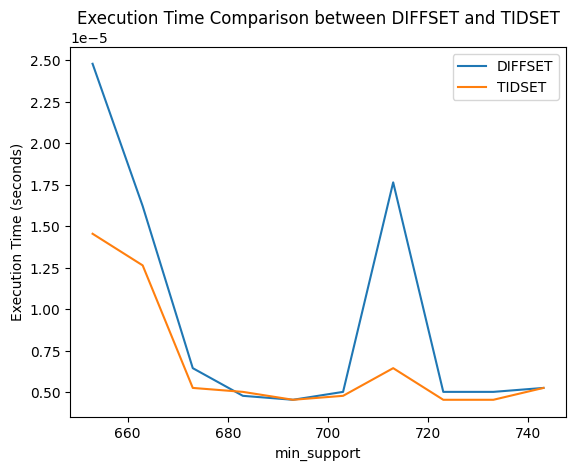

In [ ]:
def grid_search(database, min_support_values):
    diffset_times = []
    tidset_times = []

    for min_support in min_support_values:
        print(f"\nGrid Search for min_support = {min_support}")

        # Thực hiện DIFFSET
        diffsets = generate_diffsets(database)
        start_time_diffset = time.time()
        frequent_items_diffset = find_frequent_items_diffset(diffsets, min_support)
        end_time_diffset = time.time()
        elapsed_time_diffset = end_time_diffset - start_time_diffset
        print(f"DIFFSET Execution Time: {elapsed_time_diffset} seconds")
        diffset_times.append(elapsed_time_diffset)

        # Thực hiện TIDSET
        tidsets = generate_tidsets(database)
        start_time_tidset = time.time()
        frequent_items_tidset = find_frequent_items_tidset(tidsets, min_support)
        end_time_tidset = time.time()
        elapsed_time_tidset = end_time_tidset - start_time_tidset
        print(f"TIDSET Execution Time: {elapsed_time_tidset} seconds")
        tidset_times.append(elapsed_time_tidset)

    # Vẽ biểu đồ
    plt.plot(min_support_values, diffset_times, label='DIFFSET')
    plt.plot(min_support_values, tidset_times, label='TIDSET')
    plt.xlabel('min_support')
    plt.ylabel('Execution Time (seconds)')
    plt.title('Execution Time Comparison between DIFFSET and TIDSET')
    plt.legend()
    plt.show()

# Thử nghiệm trên một dải giá trị min_support
min_support_values = [653,663,673,683,693,703,713,723,733,743]

# Thực hiện grid search và vẽ biểu đồ
grid_search(database, min_support_values)

## **CẢI THIỆN THUẬT TOÁN BẰNG PHÉP GIAO NHỊ PHÂN**

In [ ]:
eclat_df = pd.read_csv('Groceries 1.csv')
eclat_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [ ]:
# Xử lý định dạng ngày tháng thành dạng chuỗi (mmyyyy)
eclat_df['Date'] = pd.to_datetime(eclat_df['Date']).dt.strftime('%m%Y')
eclat_df['Date'].head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-28-08fef92f8045>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  eclat_df['Date'] = pd.to_datetime(eclat_df['Date']).dt.strftime('%m%Y')


0    072015
1    052015
2    092015
3    122015
4    012015
Name: Date, dtype: object

In [ ]:
eclat_df['invoice'] = eclat_df['Member_number'].astype(str) + '_' + eclat_df['Date']
eclat_df = eclat_df.drop(columns=['Member_number', 'Date'])
eclat_df['invoice'].head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    1808_072015
1    2552_052015
2    2300_092015
3    1187_122015
4    3037_012015
Name: invoice, dtype: object

In [ ]:
# Start timing
start_time = time.time()

# Split the 'Items' column into separate columns
items_split = eclat_df['itemDescription'].str.split(',')

# Create a new DataFrame with 'Transaction' and 'Item' columns
df_new = pd.DataFrame([(row['invoice'], item) for _, row in eclat_df.iterrows() for item in row['itemDescription'].split(',')], columns=['invoice', 'itemDescription'])

# Pivot the DataFrame to get the desired format
df_pivoted = pd.crosstab(index=df_new['itemDescription'], columns=df_new['invoice'])

# Concatenate the values along the rows
df_pivoted['Merged'] = df_pivoted.apply(lambda row: ''.join(map(str, row)), axis=1)

# Reset index to make 'Item' a column
df_result = df_pivoted.reset_index()

# Display the result
# print(df_result[['itemDescription', 'Merged']])

transactions = df_result['Merged'].apply(list).tolist()
item_names = df_result['itemDescription'].tolist()

def support(pattern, transactions):
    return sum(1 for trans in transactions if set(pattern).issubset(trans))

# Function to generate candidate patterns
def generate_candidates(prev_pattern, transactions):
    candidates = set()
    for trans in transactions:
        candidates |= {item for item in trans if item not in prev_pattern}
    return candidates

# Function to find frequent itemsets using ECLAT
def eclat(transactions, min_support, item_names):
    frequent_itemsets = set()
    stack = [([], transactions)]

    while stack:
        current_pattern, current_transactions = stack.pop()
        current_support = support(current_pattern, current_transactions)

        if current_support >= min_support:
            frequent_itemsets.add(tuple(current_pattern))
            candidates = generate_candidates(current_pattern, current_transactions)
            for candidate in candidates:
                candidate_support = support(current_pattern + [candidate], current_transactions)
                if candidate_support >= min_support:
                    stack.append((current_pattern + [candidate], current_transactions))

    # Map binary values to item names
    frequent_itemsets_named = [tuple(item_names[int(item)] for item in itemset) for itemset in frequent_itemsets]

    return frequent_itemsets_named

# Set minimum support
min_support = 2

# Find frequent itemsets using ECLAT
result = eclat(transactions, min_support, item_names)

# Start timing
binary_intersection_execution_time = time.time() - start_time

# Display the result
# for itemset in result:
#     print(itemset)
print(f'Thời gian chạy thuật toán cải thiện bằng phép giao nhị phân là: {binary_intersection_execution_time:.2f} giây')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Thời gian chạy thuật toán cải thiện bằng phép giao nhị phân là: 23.26 giây


## **SO SÁNH TỐC ĐỘ THỰC HIỆN CỦA 3 PHƯƠNG PHÁP TÌM MẪU PHỔ BIẾN**

In [ ]:
# Thư viện sử dụng
import pandas as pd
import pyECLAT
import timeit
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


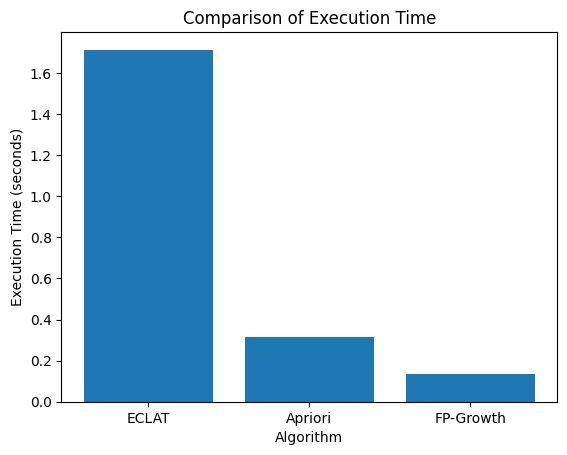

In [ ]:
# Đọc dữ liệu từ tệp CSV
data = pd.read_csv('Groceries 1_NonGroup.csv')

# Xây dựng tập dữ liệu chứa các tập hợp mục
transactions = []
for _, row in data.iterrows():
    item_set = set(row['itemDescription'].split(', '))
    transactions.append(item_set)

# Bắt đầu đo thời gian
start_time_eclat = time.time()

# Xây dựng cây Eclat
root = {'item': None, 'support': 0, 'children': {}}
for _, row in GrcsNonGroup_df.iterrows():
    item_set = row['itemDescription'].split(', ')
    current_node = root
    for item in items_nongroup:
        if item in current_node['children']:
            child = current_node['children'][item]
            child['support'] += 1
        else:
            child = {'item': item, 'support': 1, 'children': {}}
            current_node['children'][item] = child
        if child['support'] >= 0.1:
            current_node = child

# Kết thúc đo thời gian
end_time_eclat = time.time()

# Tính thời gian thực thi
eclat_time = end_time_eclat - start_time_eclat

# Định nghĩa hàm thực hiện thuật toán Apriori
def run_apriori(transactions, min_support):
    from mlxtend.preprocessing import TransactionEncoder
    from mlxtend.frequent_patterns import apriori

    te = TransactionEncoder()
    te_ary = te.fit_transform(transactions)
    df = pd.DataFrame(te_ary, columns=te.columns_)

    frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
    return frequent_itemsets

# Định nghĩa hàm thực hiện thuật toán FP-Growth
def run_fp_growth(transactions, min_support):
    from mlxtend.preprocessing import TransactionEncoder
    from mlxtend.frequent_patterns import fpgrowth

    te = TransactionEncoder()
    te_ary = te.fit_transform(transactions)
    df = pd.DataFrame(te_ary, columns=te.columns_)

    frequent_itemsets = fpgrowth(df, min_support=min_support, use_colnames=True)
    return frequent_itemsets

# Thực hiện đo thời gian chạy của các thuật toán
min_support = 0.01

apriori_time = timeit.timeit(lambda: run_apriori(transactions, min_support), number=1)
fp_growth_time = timeit.timeit(lambda: run_fp_growth(transactions, min_support), number=1)

# Trực quan hóa dữ liệu so sánh
labels = ['ECLAT', 'Apriori', 'FP-Growth']
times = [eclat_time, apriori_time, fp_growth_time]

plt.bar(labels, times)
plt.ylabel('Execution Time (seconds)')
plt.xlabel('Algorithm')
plt.title('Comparison of Execution Time')
plt.show()

ECLAT được thực hiện khác với các thuật toán khác (build thủ công và thư viện) nên không thể thực hiện so sánh theo cách này. Vì theo thực tế ECLAT có độ phức tạp thời gian bé hơn Apriori